In [ ]:
import torch
from data_processing import process_data

# show the version of pytorch
print(torch.__version__)


In [ ]:
# Read mat file using hdf5
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import random
import pickle


In [ ]:
f = h5py.File('raw_data/Part_1.mat', 'r')

In [ ]:
len(f), list(f.keys())

In [ ]:
len(f['Part_1'])

In [ ]:
len(f[f['Part_1'][99][0]])

In [ ]:
f[f['Part_1'][99][0]][69]

### Read kaggle mat file


In [ ]:
# Read the mat file
from scipy.io import loadmat 
mat = loadmat('raw_data_k/part_1.mat')['p']

In [ ]:
len(mat[0])

In [ ]:
len(mat[0][99][0])

In [ ]:
mat[0][0][1]

In [ ]:
bp = mat[0][99][1].tolist() 

In [ ]:
fs = 125								# sampling frequency
t = 10									# length of ppg episodes
dt = 5									# step size of taking the next episode

samples_in_episode = round(fs * t)


max(bp[0:0 + samples_in_episode])


In [ ]:

candidates = pickle.load(open('candidates.p', 'rb'))

record_no = int(candidates[0][1])

In [ ]:
mat[0][record_no][1][69]

In [ ]:
from kaggle_dataprocessing import process_data

process_data()

In [ ]:
from data_processing import process_data

process_data()

In [ ]:
from data_processing import observe_processed_data

observe_processed_data()


In [ ]:
from data_processing import downsample_data

downsample_data()


In [ ]:
from kaggle_dataprocessing import extract_episodes
import pickle

candidates = pickle.load(open('candidates.p', 'rb'))
extract_episodes(candidates)


In [ ]:
from kaggle_dataprocessing import merge_episodes

merge_episodes()


In [ ]:
from data_handling import fold_data

fold_data()


In [ ]:
!python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [ ]:
from helper_functions import *
from models import *
from train_models import train_approximate_network

train_approximate_network()


In [ ]:
from helper_functions import *
from models import UNetDS64, MultiResUNet1D
import os
from predict_test import predict_test_data

predict_test_data()

In [ ]:
import pandas as pd
import pickle


In [ ]:
# load the test pickle file

test_data = pickle.load(open('data/test.p', 'rb'))

In [ ]:
test_data['X_test'][0].shape


In [ ]:
test_data['X_test'][0][:40]

In [ ]:
df = pd.DataFrame({'ppg' : list(test_data['X_test'][0])[0], 'abp': list(test_data['Y_test'][0])[0]})

## unprocessed mat file

In [1]:
import scipy.io as sio

# load the test mat file
test_mat = sio.loadmat('raw_data_k/part_1.mat')

In [2]:
test_mat['p'][0][0][0][:10]

array([1.75953079, 1.71847507, 1.68426197, 1.65786901, 1.63734115,
       1.61583578, 1.59335288, 1.57086999, 1.54936461, 1.52688172])

### processed mat file

In [3]:
import pickle 

dt = pickle.load(open(os.path.join('data','train0.p'),'rb'))
dt['X_train'][0][:10]

array([[0.10549451],
       [0.1035409 ],
       [0.1015873 ],
       [0.0998779 ],
       [0.0979243 ],
       [0.0962149 ],
       [0.09450549],
       [0.09304029],
       [0.09157509],
       [0.09010989]])

In [4]:
mdt = pickle.load(open(os.path.join('data', 'meta0.p'), 'rb'))
mdt

{'max_ppg': 4.002932551319648,
 'min_ppg': 0.0,
 'max_abp': 199.98749589709124,
 'min_abp': 50.0}

In [5]:
tdt = pickle.load(open(os.path.join('data', 'test.p'), 'rb'))
tdt['Y_test'][0][:10]

array([[0.41108387],
       [0.41499172],
       [0.41772721],
       [0.42085349],
       [0.42280742],
       [0.42437055],
       [0.42554291],
       [0.42593369],
       [0.42554291],
       [0.42476134]])

## profs data

In [6]:
multiplier = 1e-6 / 5

In [6]:
# read the csv
import pickle
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import os
from glob import glob

PATH = r'C:\Users\LuckyVerma\Documents\ABP-estimation-using-PPG\PPG2ABP\codes_25hz\module2out-ABUD-Hovid_CC\ABUD07_Salvaged'  # use your pathimport os
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

df_from_each_file = (pd.read_csv(f) for f in all_csv_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [7]:
ndf = df[['Green', 'SBP', 'DBP']]
ndf['Green'] = ndf['Green'].apply(lambda x: [x])  # * multiplier
ndf.head()

C:\Users\LUCKYV~1\AppData\Local\Temp/ipykernel_22560/1905737026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Green'] = ndf['Green'].apply(lambda x: [x])  # * multiplier


,Green,SBP,DBP
0,[27157612],120,66
1,[27165977],120,66
2,[27172450],120,66
3,[27183158],120,66
4,[27194485],120,66


#### Before normalization

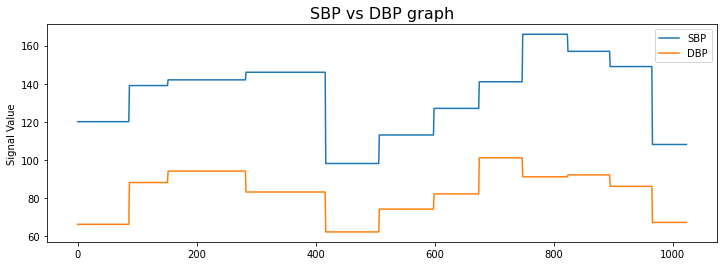

In [8]:
## Visualizing SBP and DBP
fig, ax = plt.subplots(1,1, figsize=(12,4))

plt.title('SBP vs DBP graph', fontsize=16)
plt.ylabel('Signal Value')
plt.plot(df['SBP'][:1024])
plt.plot(df['DBP'][:1024])
plt.legend(['SBP', 'DBP'])

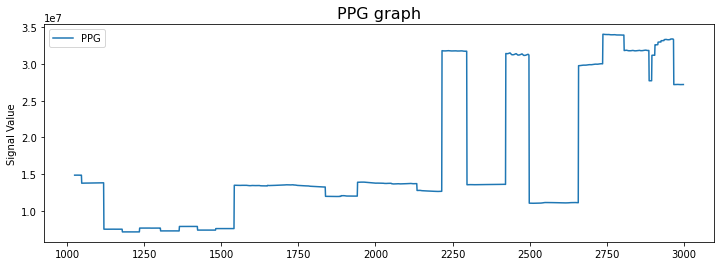

In [9]:
## Visualizing SBP and DBP
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

plt.title('PPG graph', fontsize=16)
plt.ylabel('Signal Value')
plt.plot(df['Green'][1024:3000])
plt.legend(['PPG'])

### Create meta data

In [10]:
max_ppg = -10000                    # intialize metadata, min-max of abp,ppg signals
min_ppg = 10000
max_abp = -10000
min_abp = 10000



In [11]:
max_ppg = max(df['Green'].tolist()) # * multiplier
min_ppg = min(df['Green'].tolist()) # * multiplier
max_abp = max(df['SBP'].tolist())
min_abp = min(df['DBP'].tolist())

meta = {
    'max_ppg': max_ppg,
    'min_ppg': min_ppg,
    'max_abp': max_abp,
    'min_abp': min_abp
}


In [12]:
meta

{'max_ppg': 70011940, 'min_ppg': 6791599, 'max_abp': 166, 'min_abp': 48}

### Inittialize test data

### X_test

In [14]:
def convert_1d_to_2d(l, cols):
    return [l[i:i + cols] for i in range(0, len(l), cols)]

X_test = np.array(convert_1d_to_2d(ndf['Green'].tolist(), 1024)[:-1])


In [15]:
X_test.shape, X_test[0]

((7, 1024, 1),
 array([[27157612],
        [27165977],
        [27172450],
        ...,
        [14856697],
        [14857106],
        [14857318]]))

In [16]:
# Normalize data

X_test -= min_ppg  # normalizing
X_test = X_test / (max_ppg - min_ppg)

X_test.shape, X_test[0]


((7, 1024, 1),
 array([[0.32214336],
        [0.32227567],
        [0.32237806],
        ...,
        [0.12757125],
        [0.12757772],
        [0.12758107]]))

#### After normalization

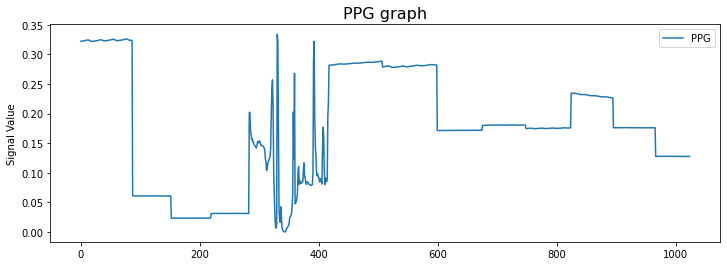

In [17]:
## Visualizing SBP and DBP
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

plt.title('PPG graph', fontsize=16)
plt.ylabel('Signal Value')
plt.plot(X_test[0][:1024])
plt.legend(['PPG'])

In [18]:
df['Green'].shape, X_test[0].shape

((7254,), (1024, 1))

## Results

In [19]:
from helper_functions import *
from models import UNetDS64, MultiResUNet1D
import os

In [20]:
length = 1024  # length of signal

mdl1 = UNetDS64(length)  # creating approximation network
mdl1.load_weights(os.path.join('models',
                                'ApproximateNetwork.h5'))  # loading weights

Y_test_pred_approximate = mdl1.predict(
    X_test, verbose=1)  # predicting approximate abp waveform

pickle.dump(Y_test_pred_approximate,
            open('test_output_approximate.p',
                    'wb'))  # saving the approxmiate predictions

mdl2 = MultiResUNet1D(length)  # creating refinement network
mdl2.load_weights(os.path.join('models',
                                'RefinementNetwork.h5'))  # loading weights

Y_test_pred = mdl2.predict(Y_test_pred_approximate[0],
                            verbose=1)  # predicting abp waveform

pickle.dump(Y_test_pred, open('test_output.p',
                                'wb'))  # saving the predicted abp waeforms


1/1 [==============================] - 2s 2s/step


### Y_test

In [21]:
# Y_test -= min_abp  # normalizing
# Y_test /= (max_abp - min_abp)


In [22]:
import pickle
Ypred = pickle.load(open('test_output.p','rb'))      # loading prediction


In [23]:
Ypred.shape

(7, 1024, 1)

### Evaluation

In [24]:
def predicting_ABP_waveform(X_test, mdt):
	"""
		An interactive way to predict the ABP waveform from PPG signal
		from the test data.
		Ground truth, prediction from approximation network and refinement network
		are presented, and a comparison is also demonstrated
	"""
	
	X_test = X_test	# loading test data
	# Y_test = dt['Y_test']

	# loading metadata
	max_ppg = mdt['max_ppg']
	min_ppg = mdt['min_ppg']
	max_abp = mdt['max_abp']
	min_abp = mdt['min_abp']

	Y_test_pred_approximate = pickle.load(open('test_output_approximate.p', 'rb'))	# loading precomputed output from approximation network
	Y_test_pred_approximate = Y_test_pred_approximate[0]		# taking the actual output, the rest are intermediate ones

	Y_test_pred = pickle.load(open('test_output.p', 'rb'))	# loading precomputed output from refinement network
	
	num_test_samples = len(Y_test_pred)	

	while(True):			# interactive cli

		indix = int(input(
			'Please input a record from 1 to {} to visualize.\nInput -1 to quit.\n> '.format(num_test_samples)))

		if(indix == -1):			# exit
			break

		if(indix < 1 or indix > num_test_samples):			# wrong index
			continue

		indix -= 1

		ppg_signal = X_test[indix] * max_ppg + min_ppg											# input ppg signal
		abp_signal_pred_approximate = Y_test_pred_approximate[indix] * max_abp + min_abp		# abp waveform approx.
		abp_signal_pred = Y_test_pred[indix] * max_abp + min_abp								# abp waveform predicted
		# abp_signal_ground_truth = Y_test[indix] * max_abp + min_abp								# abp waveform ground truth

		time_scale = np.arange(0, 8.192, 8.192/len(ppg_signal))									# series for time axis

		plt.figure(figsize=(30, 15))

		plt.subplot(5, 1, 1)
		plt.plot(time_scale, ppg_signal, c='k', linewidth=2)
		plt.title('Input PPG Signal', fontsize=20)

		plt.subplot(5, 1, 2)
		plt.plot(time_scale, abp_signal_pred_approximate, c='r', linewidth=2)
		plt.ylabel('ABP (mmHg)', fontsize=15)
		plt.title('Output of Approximate Network', fontsize=20)

		plt.subplot(5, 1, 3)
		plt.plot(time_scale, abp_signal_pred, c='b', linewidth=2)
		plt.ylabel('ABP (mmHg)', fontsize=15)
		plt.title('Output of Refinement Network', fontsize=20)

		# plt.subplot(5, 1, 4)
		# plt.plot(time_scale, abp_signal_ground_truth, c='g', linewidth=2)
		# plt.ylabel('ABP (mmHg)', fontsize=15)
		# plt.title('Ground Truth', fontsize=20)

		plt.subplot(5, 1, 5)
		plt.plot(time_scale, abp_signal_pred_approximate, c='r', label='Output Level 1', linewidth=2)
		plt.plot(time_scale, abp_signal_pred, c='b', label='Output Level 2', linewidth=2)
		# plt.plot(time_scale, abp_signal_ground_truth, c='g', label='Ground Truth', linewidth=2)
		plt.title('Comparison', fontsize=20)
		plt.xlabel('Time (sec)', fontsize=15)
		plt.ylabel('ABP (mmHg)', fontsize=15)

		plt.tight_layout()

		plt.show()

In [25]:
# predicting_ABP_waveform(X_test, meta)

### Bland Altman plot

In [26]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def bland_altman_plot():
    """
		Draws the Bland Altman plot
	"""

    def bland_altman(data1, data2):
        """
		Computes mean +- 1.96 sd
		
		Arguments:
			data1 {array} -- series 1
			data2 {array} -- series 2
		"""

        data1 = np.asarray(data1)
        data2 = np.asarray(data2)
        mean = np.mean([data1, data2], axis=0)
        diff = data1 - data2  # Difference between data1 and data2
        md = np.mean(diff)  # Mean of the difference
        sd = np.std(diff, axis=0)  # Standard deviation of the difference

        plt.scatter(mean, diff, alpha=0.5, s=8)
        plt.axhline(md, color='gray', linestyle='--')
        plt.axhline(md + 1.96 * sd, color='gray', linestyle='--')
        plt.axhline(md - 1.96 * sd, color='gray', linestyle='--')
        plt.ylim(ymin=-75, ymax=75)
        plt.xlabel('Avg. of Target and Estimated Value (mmHg)', fontsize=14)
        plt.ylabel('Error in Prediction (mmHg)', fontsize=14)
        print(md + 1.96 * sd, md - 1.96 * sd)

        return str(md + 1.96 * sd) + ' | ' + str(md - 1.96 * sd)

    YtrueSBP = np.array(convert_1d_to_2d(ndf['SBP'].tolist(), 1024)[:-1]).tolist()
    YtrueDBP = np.array(convert_1d_to_2d(ndf['DBP'].tolist(), 1024)[:-1]).tolist()

    Ypred = pickle.load(open('test_output.p','rb'))      # loading prediction
    Ypred = Ypred * max_abp + min_abp

    sbpTrues = []
    sbpPreds = []

    dbpTrues = []
    dbpPreds = []

    mapTrues = []
    mapPreds = []

    for i in (range(len(Ypred))):
        y_sbp = YtrueSBP[i]
        y_dbp = YtrueDBP[i]
        y_p = Ypred[i].ravel()

        sbpTrues.append(max(y_sbp))
        sbpPreds.append(max(y_p))

        dbpTrues.append(min(y_dbp))
        dbpPreds.append(min(y_p))

        mapTrues.append(np.mean([max(y_sbp), min(y_dbp)]))
        mapPreds.append(np.mean(y_p))

        
    '''
		Plots the Bland Altman plot
	'''

    fig = plt.figure(figsize=(18, 5), dpi=120)
    plt.subplot(1, 3, 1)
    print('---------DBP---------')
    ba_dbp = bland_altman(dbpTrues, dbpPreds)
    plt.title('Bland-Altman Plot for DBP Prediction', fontsize=18)

    plt.subplot(1, 3, 2)
    print('---------MAP---------')
    ba_map = bland_altman(mapTrues, mapPreds)
    plt.title('Bland-Altman Plot for MAP Prediction', fontsize=18)

    plt.subplot(1, 3, 3)
    print('---------SBP---------')
    ba_sbp = bland_altman(sbpTrues, sbpPreds)
    plt.title('Bland-Altman Plot for SBP Prediction', fontsize=18)

    plt.show()

    return plt, ba_dbp, ba_map, ba_sbp


---------DBP---------
2.8641473210285575 -27.77525397560445
---------MAP---------
26.544148261573913 -13.689329100022572
---------SBP---------
38.598496131892716 -33.06719381604451


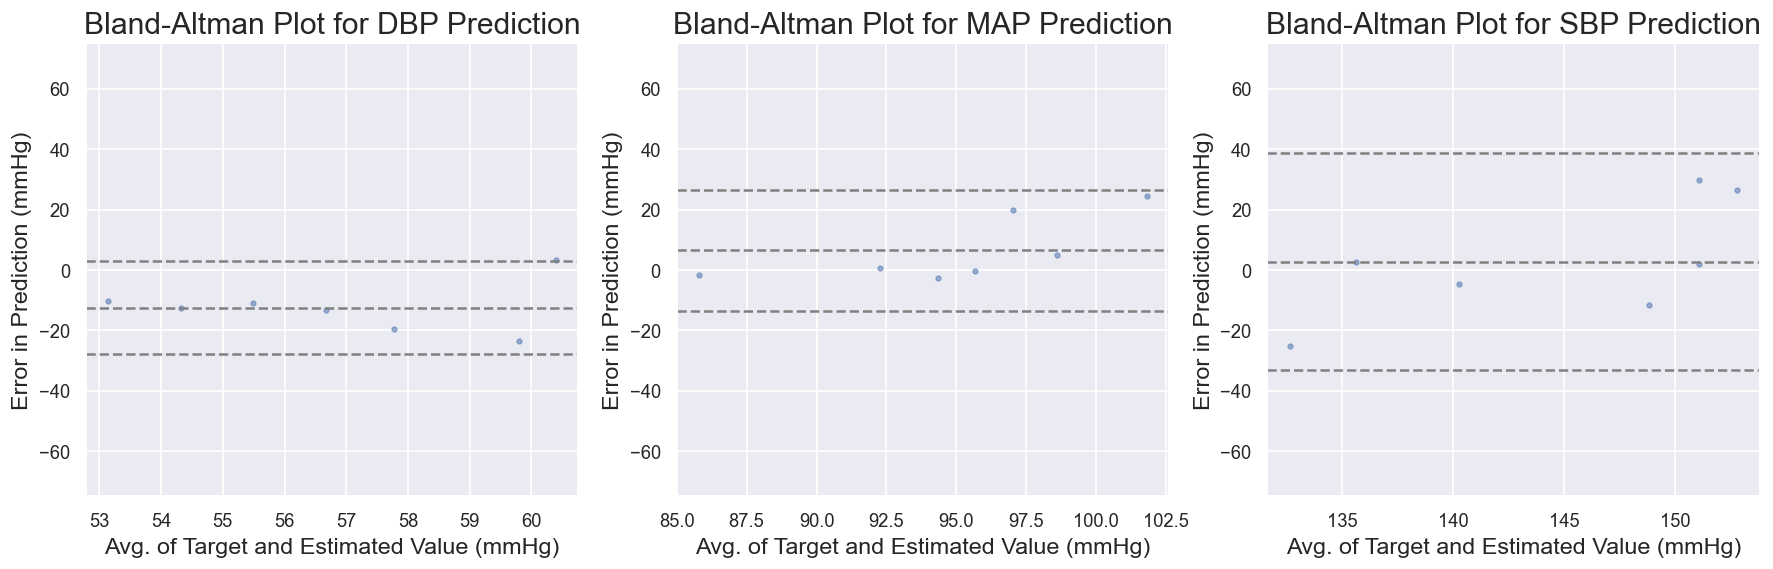

In [27]:
bland_altman_plot();

In [28]:
def evaluate_BHS_Standard(X_test):
    """
		Evaluates PPG2ABP based on
		BHS Standard Metric
	"""

    def newline(p1, p2):
        """
		Draws a line between two points
		
		Arguments:
			p1 {list} -- coordinate of the first point
			p2 {list} -- coordinate of the second point
		
		Returns:
			mlines.Line2D -- the drawn line
		"""
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()

        if(p2[0] == p1[0]):
            xmin = xmax = p1[0]
            ymin, ymax = ax.get_ybound()
        else:
            ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
            ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

        l = mlines.Line2D([xmin, xmax], [ymin, ymax], linewidth=1, linestyle='--')
        ax.add_line(l)
        return l

    def BHS_metric(err):
        """
		Computes the BHS Standard metric
		
		Arguments:
			err {array} -- array of absolute error
		
		Returns:
			tuple -- tuple of percentage of samples with <=5 mmHg, <=10 mmHg and <=15 mmHg error
		"""

        leq5 = 0
        leq10 = 0
        leq15 = 0

        for i in range(len(err)):

            if(abs(err[i]) <= 5):
                leq5 += 1
                leq10 += 1
                leq15 += 1

            elif(abs(err[i]) <= 10):
                leq10 += 1
                leq15 += 1

            elif(abs(err[i]) <= 15):
                leq15 += 1

        return (leq5*100.0/len(err), leq10*100.0/len(err), leq15*100.0/len(err))

    def calcError(Ypred, max_abp, min_abp, max_ppg, min_ppg):

        YtrueSBP = np.array(convert_1d_to_2d(ndf['SBP'].tolist(), 1024)[:-1]).tolist()
        YtrueDBP = np.array(convert_1d_to_2d(ndf['DBP'].tolist(), 1024)[:-1]).tolist()

        sbps = []
        dbps = []
        maps = []
        maes = []
        gt = []

        hist = []

        for i in (range(len(Ypred))):
            y_sbp = YtrueSBP[i]
            y_dbp = YtrueDBP[i]
            y_p = Ypred[i].ravel()

            dbps.append(abs(min(y_dbp)-min(y_p)))
            sbps.append(abs(max(y_sbp)-max(y_p)))
            maps.append(abs(np.mean([max(y_sbp), min(y_dbp)]) - np.mean(y_p)))
        
        return (sbps, dbps, maps)
        

    Y_pred = pickle.load(open('test_output.p', 'rb'))       # loading prediction
    Y_pred = Y_pred * max_abp + min_abp

    (sbps, dbps, maps) = calcError(Y_pred, max_abp, min_abp, max_ppg, min_ppg)   # compute errors

    sbp_percent = BHS_metric(sbps)           # compute BHS metric for sbp
    dbp_percent = BHS_metric(dbps)           # compute BHS metric for dbp
    map_percent = BHS_metric(maps)           # compute BHS metric for map

    print('----------------------------')
    print('|        BHS-Metric        |')
    print('----------------------------')

    print('----------------------------------------')
    print('|     | <= 5mmHg | <=10mmHg | <=15mmHg |')
    print('----------------------------------------')
    print('| DBP |  {} %  |  {} %  |  {} %  |'.format(round(dbp_percent[0], 1), round(dbp_percent[1], 1), round(dbp_percent[2], 1)))
    print('| MAP |  {} %  |  {} %  |  {} %  |'.format(round(map_percent[0], 1), round(map_percent[1], 1), round(map_percent[2], 1)))
    print('| SBP |  {} %  |  {} %  |  {} %  |'.format(round(sbp_percent[0], 1), round(sbp_percent[1], 1), round(sbp_percent[2], 1)))
    print('----------------------------------------')

    '''
		Plot figures
	'''

    ## SBPS ##

    fig = plt.figure(figsize=(18, 4), dpi=120)
    ax1 = plt.subplot(1,3,1)
    ax2 = ax1.twinx()
    sns.distplot(sbps, bins=100, kde=False, rug=False, ax=ax1)
    sns.distplot(sbps, bins=100, kde=False, rug=False, ax=ax2)
    ax2.set_yticklabels(['0 \%', '3.67 \%', '7.34 \%',
          '11.01 \%', '14.67 \%', '18.34 \%', '22.01 \%'])
    ax1.set_xlabel(r'$|$'+'Error'+r'$|$' + ' (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
    ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Absolute Error in SBP Prediction', fontsize=18)
    plt.xlim(xmax=60.0, xmin=0.0)
    plt.xticks(np.arange(0, 60+1, 5))
    p1 = [5, 0]
    p2 = [5, 10000]
    newline(p1, p2)
    p1 = [10, 0]
    p2 = [10, 10000]
    newline(p1, p2)
    p1 = [15, 0]
    p2 = [15, 10000]
    newline(p1, p2)
    plt.tight_layout()

    ## DBPS ##


    ax1 = plt.subplot(1,3,2)
    ax2 = ax1.twinx()
    sns.distplot(dbps, bins=100, kde=False, rug=False, ax=ax1)
    sns.distplot(dbps, bins=100, kde=False, rug=False, ax=ax2)
    ax2.set_yticklabels(['0 \%', '7.34 \%', '14.67 \%',
          '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel(r'$|$'+'Error'+r'$|$' + ' (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
    ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Absolute Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=60.0, xmin=0.0)
    plt.xticks(np.arange(0, 60+1, 5))
    p1 = [5, 0]
    p2 = [5, 10000]
    newline(p1, p2)
    p1 = [10, 0]
    p2 = [10, 10000]
    newline(p1, p2)
    p1 = [15, 0]
    p2 = [15, 10000]
    newline(p1, p2)
    plt.tight_layout()

    ## MAPS ##


    ax1 = plt.subplot(1,3,3)
    ax2 = ax1.twinx()
    sns.distplot(maps, bins=100, kde=False, rug=False, ax=ax1)
    sns.distplot(maps, bins=100, kde=False, rug=False, ax=ax2)
    ax2.set_yticklabels(['0 \%', '7.34 \%', '14.67 \%', '22.01 \%',
          '29.35 \%', '36.68 \%', '44.02 \%', '51.36 \%'])
    ax1.set_xlabel(r'$|$'+'Error'+r'$|$' + ' (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
    ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Absolute Error in MAP Prediction', fontsize=18)
    plt.xlim(xmax=60.0, xmin=0.0)
    plt.xticks(np.arange(0, 60+1, 5))
    p1 = [5, 0]
    p2 = [5, 10000]
    newline(p1, p2)
    p1 = [10, 0]
    p2 = [10, 10000]
    newline(p1, p2)
    p1 = [15, 0]
    p2 = [15, 10000]
    newline(p1, p2)
    plt.tight_layout()

    plt.show()

    return plt, [round(dbp_percent[0], 1), round(dbp_percent[1], 1), round(dbp_percent[2], 1)], [round(map_percent[0], 1), round(map_percent[1], 1), round(map_percent[2], 1)], [round(sbp_percent[0], 1), round(sbp_percent[1], 1), round(sbp_percent[2], 1)]


----------------------------
|        BHS-Metric        |
----------------------------
----------------------------------------
|     | <= 5mmHg | <=10mmHg | <=15mmHg |
----------------------------------------
| DBP |  14.3 %  |  14.3 %  |  71.4 %  |
| MAP |  71.4 %  |  71.4 %  |  71.4 %  |
| SBP |  42.9 %  |  42.9 %  |  57.1 %  |
----------------------------------------


c:\Users\LuckyVerma\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LUCKYV~1\AppData\Local\Temp/ipykernel_30216/2777999575.py:120: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 \%', '3.67 \%', '7.34 \%',
C:\Users\LUCKYV~1\AppData\Local\Temp/ipykernel_30216/2777999575.py:146: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 \%', '7.34 \%', '14.67 \%',
C:\Users\LUCKYV~1\AppData\Local\Temp/ipykernel_30216/2777999575.py:172: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 \%', '7.34 \%', '14.67 \%', '22.01 \%',


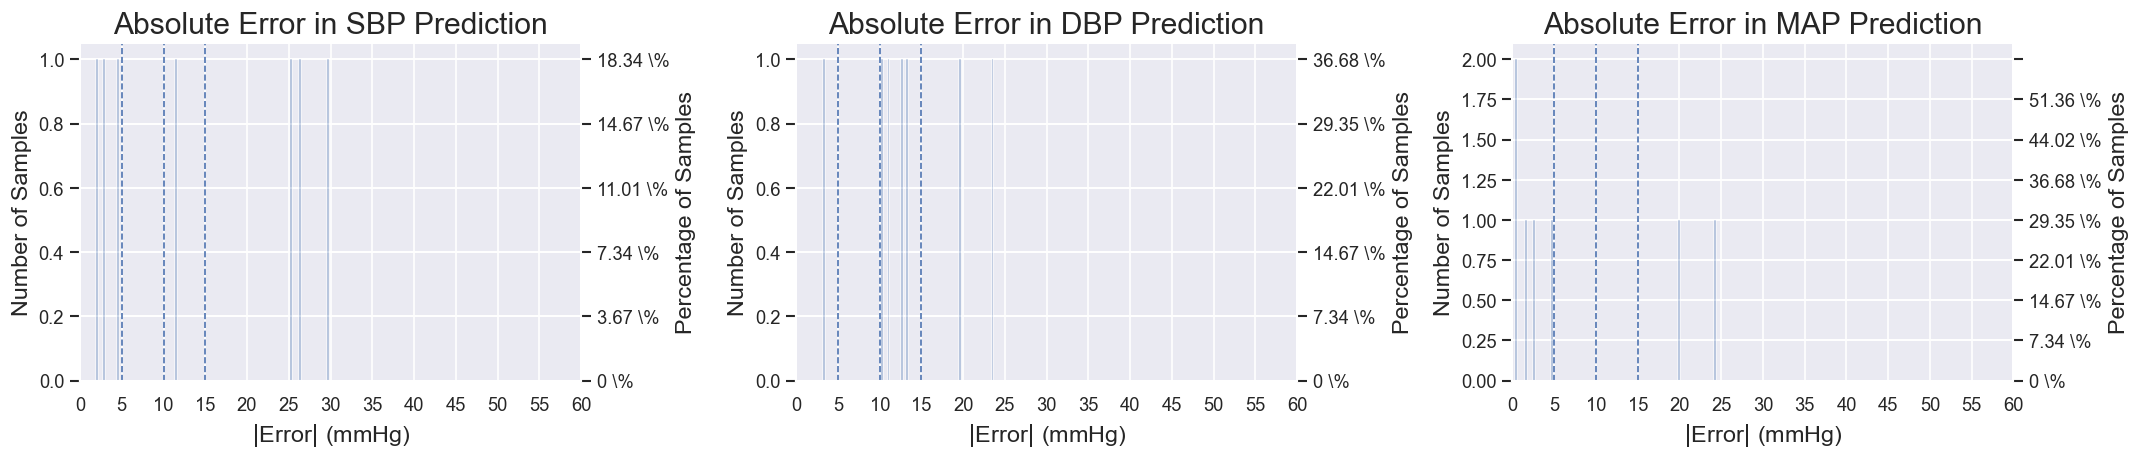

In [29]:
evaluate_BHS_Standard(X_test);

## pyAmp plot

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy import sin, pi
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt
from pyampd.ampd import find_peaks, find_peaks_original, find_peaks_adaptive

In [17]:
import pickle

Ypred = pickle.load(open('test_output.p', 'rb'))  # loading prediction
len(Ypred)

7

Text(0.5, 1.0, 'Output of Refinement Network')

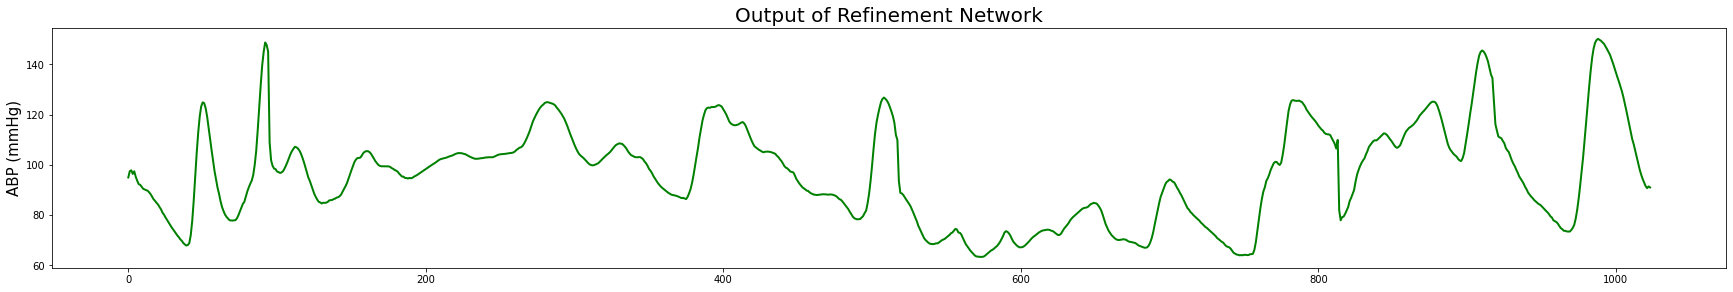

In [83]:
i = 1

abp_signal_pred = Ypred[i] * max_abp + min_abp		
	
plt.figure(figsize=(30, 15))
plt.subplot(3, 1, 3)
plt.plot(abp_signal_pred, c='g', linewidth=2)
plt.ylabel('ABP (mmHg)', fontsize=15)
plt.title('Output of Refinement Network', fontsize=20)						# abp waveform predicted

In [91]:
from pyampd.ampd import find_peaks

fs = 25
N = int(40.96 * fs)
t = np.linspace(0, 40.96, N)

ll = abp_signal_pred.tolist()
x = np.array([i[0] for i in ll])

pks = find_peaks(x)

Text(0, 0.5, 'signal')

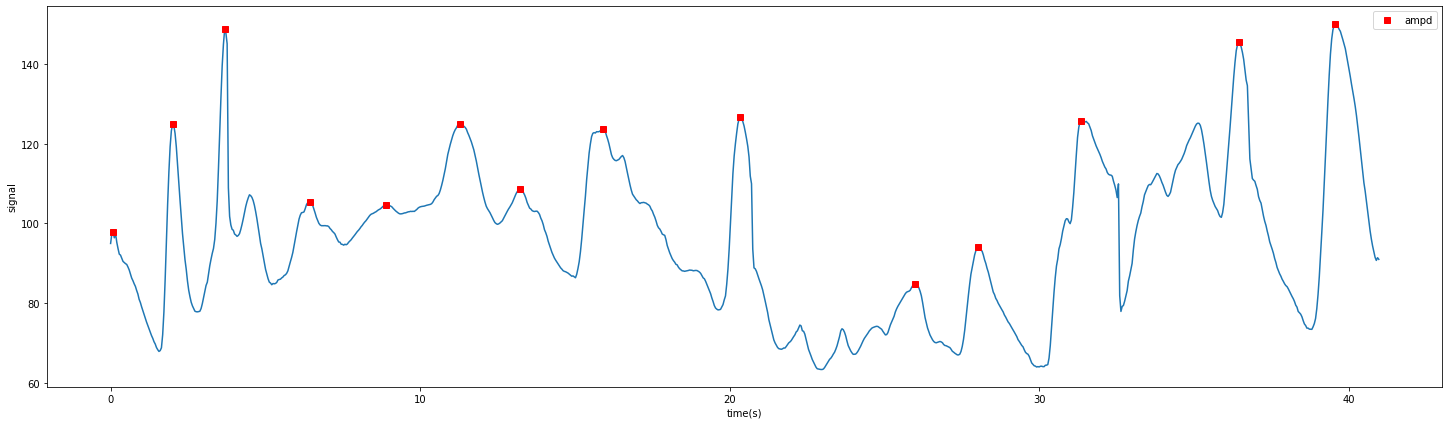

In [92]:
plt.figure(figsize=(25, 7))
plt.plot(t, x, '-')
plt.plot(t[pks], x[pks], 'rs', label='ampd')
plt.legend()
plt.xlabel('time(s)')
plt.ylabel('signal')